# Introduction

## Installing Julia.

Download Julia 1.0 (or higher) from its website, and then follow the instructions to install it on your platform. You’ll want to make sure it’s working before proceeding to install additional packages, as described below.


## Installing packages.

While most of the Julia code we use in this companion is from the base or core of the Julia language, several important functions are contained in other packages that you must explicitly install. Here we explain how to do this. The installation has to be done only once.

To add (install) a Julia package you use the package manager system, which is entered by typing ] to the Julia prompt. You’ll then see the package manager prompt, `(v1.0) pkg>`. If you type `?`, you’ll see a list of package manager commands. You exit the package manager by typing Ctrl-C (Control-C), which returns you to the julia prompt.

To add a package called `PackageName`, type `add PackageName` to the package control prompt. It may take a few minutes to get the required packages, compile, and install them. If you type status, you’ll see what packages are installed. If you type up, installed packages will be upgraded, if needed.

This companion will use functions from the following packages:

- `LinearAlgebra`
- `SparseArrays`
- `Plots`

On a few occasions we use functions from the packages Random and DSP, but we will mention this in the text when we use these functions.

Here’s what it looks like when you install the `Plots` package.

In [8]:
using Pkg

In [9]:
Pkg.add("Plots")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
 Resolving package versions...
 Installed Missings ─────────── v0.4.2
 Installed ColorTypes ───────── v0.8.0
 Installed FixedPointNumbers ── v0.6.1
 Installed GeometryTypes ────── v0.7.6
 Installed StatsBase ────────── v0.32.0
 Installed Plots ────────────── v0.26.3
 Installed OrderedCollections ─ v1.1.0
 Installed FFMPEG ───────────── v0.2.2
 Installed StaticArrays ─────── v0.11.0
 Installed DataStructures ───── v0.17.0
 Installed PlotUtils ────────── v0.5.8
 Installed Showoff ──────────── v0.3.1
 Installed RecipesBase ──────── v0.7.0
 Installed Colors ───────────── v0.9.6
 Installed DataAPI ──────────── v1.0.1
 Installed IterTools ────────── v1.2.0
 Installed GR ───────────────── v0.41.0
  Updating `~/.julia/environments/v1.2/Project.toml`
  [91a5bcdd] + Plots v0.26.3
  Updating `~/.julia/environments/v1.2/Manifest.toml`
  [3da002f7] + ColorTypes v0.8.0
  [5ae5909

In [10]:
using Plots

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1242


In [14]:
Pkg.status()

    Status `~/.julia/environments/v1.2/Project.toml`
  [7073ff75] IJulia v1.20.0
  [91a5bcdd] Plots v0.26.3


In [15]:
Pkg.installed()

Dict{String,Union{Nothing, VersionNumber}} with 2 entries:
  "IJulia" => v"1.20.0"
  "Plots"  => v"0.26.3"

## The VMLS package. 

We have created a small package called `VMLS`. It contains a few functions that use notation closer to VMLS notation or are easier to use than the corresponding Julia functions, basic implementations of some algorithms in VMLS, and functions that generate data used in examples. The list of functions is given in Appendix A. To install `VMLS`, go to the package manager from the Julia prompt, then install it as follows.

In [17]:
Pkg.add(PackageSpec(url="https://github.com/VMLS-book/VMLS.jl"))

  Updating git-repo `https://github.com/VMLS-book/VMLS.jl`
Fetching: [========================================>]  100.0 %.0 %  Updating git-repo `https://github.com/VMLS-book/VMLS.jl`
 Resolving package versions...
  Updating `~/.julia/environments/v1.2/Project.toml`
  [44dac47c] + VMLS v0.3.0 #master (https://github.com/VMLS-book/VMLS.jl)
  Updating `~/.julia/environments/v1.2/Manifest.toml`
  [44dac47c] + VMLS v0.3.0 #master (https://github.com/VMLS-book/VMLS.jl)


## Using packages. 

Once a package is installed (which needs to be done only once), you import it into Julia with the command using, followed by the package name, or a comma separated list of package names. This too can take some time. After executing this command you can access the functions contained in the packages.

To run any the code fragments in this companion you will need to first execute the statement

In [18]:
using LinearAlgebra, SparseArrays, VMLS

┌ Info: Precompiling VMLS [44dac47c-a70e-11e8-3cff-fbf5f1f7c554]
└ @ Base loading.jl:1242


In [19]:
Pkg.status()

    Status `~/.julia/environments/v1.2/Project.toml`
  [7073ff75] IJulia v1.20.0
  [91a5bcdd] Plots v0.26.3
  [44dac47c] VMLS v0.3.0 #master (https://github.com/VMLS-book/VMLS.jl)


When we use other packages (in particular, `Plots`), we include the using statement in the code.

# Chapter 1 Vectors

## Vectors

In [1]:
x = [ -1.1, 0.0, 3.6, -7.2 ]

4-element Array{Float64,1}:
 -1.1
  0.0
  3.6
 -7.2

In [2]:
length(x)

4

In [3]:
y = [ -1.1; 0.0; 3.6; -7.2 ]

4-element Array{Float64,1}:
 -1.1
  0.0
  3.6
 -7.2

In [20]:
using Plots 

In [21]:
temps = [ 71, 71, 68, 69, 68, 69, 68, 74, 77, 82, 85, 86,
 88, 86, 85, 86, 84, 79, 77, 75, 73, 71, 70, 70, 69, 69, 69,
 69, 67, 68, 68, 73, 76, 77, 82, 84, 84, 81, 80, 78, 79, 78,
 73, 72, 70, 70, 68, 67 ];

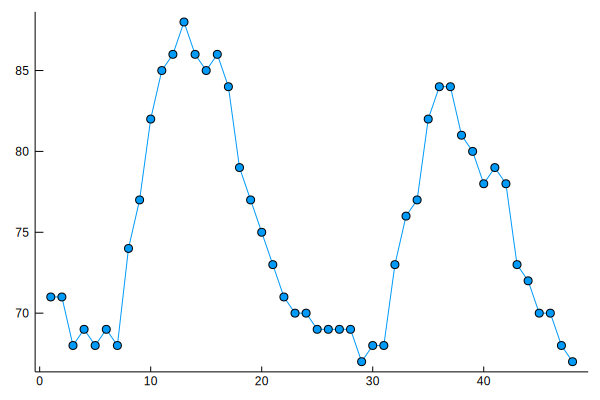

In [40]:
plot(temps, marker = :circle, legend = false, grid = false)

In [23]:
savefig("temperature.pdf")

# Chapter 2: Linear functions

## 2.3 Regression model

### Regression model.

The regression model is the affine function of $x$ given by $f (x) = x^T \beta + v$, where the $n$-vector $\beta$ and the scalar $v$ are the parameters in the model. The regression model is used to guess or approximate a real or observed value of the number $y$ that is associated with $x$. (We’ll see later how to find the parameters in a regression model, using data.)

Let’s define the regression model for house sale prices described on page 39 of VMLS, and compare its prediction to the true house sale price $y$ for a few values of $x$.

In [26]:
# Parameters in regression model
beta = [148.73, -18.85]; v = 54.40;
y_hat(x) = x'*beta + v;
# Evaluate regression model prediction
x = [0.846, 1]; y = 115;
y_hat(x), y

(161.37557999999999, 115)

In [27]:
x = [1.324,2];  y = 234.50;
y_hat(x), y

(213.61852000000002, 234.5)

In [28]:
D = house_sales_data();

In [29]:
price = D["price"]

774-element Array{Float64,1}:
  94.905
  98.937
 100.309
 106.25 
 107.502
 108.75 
 110.7  
 113.263
 116.25 
 120.0  
 121.63 
 122.0  
 122.682
   ⋮    
 224.252
 225.0  
 228.0  
 229.027
 229.5  
 230.0  
 230.0  
 232.425
 234.0  
 235.0  
 235.301
 235.738

In [31]:
area = D["area"]

774-element Array{Float64,1}:
 0.941
 1.146
 0.909
 1.289
 1.02 
 1.022
 1.134
 0.844
 0.795
 0.588
 1.356
 1.118
 1.329
 ⋮    
 0.96 
 1.456
 1.45 
 1.358
 1.329
 1.715
 1.262
 2.28 
 1.477
 1.216
 1.685
 1.362

In [32]:
beds = D["beds"]

774-element Array{Int64,1}:
 2
 3
 3
 3
 3
 2
 2
 2
 2
 2
 3
 3
 4
 ⋮
 3
 3
 3
 3
 4
 4
 3
 4
 3
 3
 4
 3

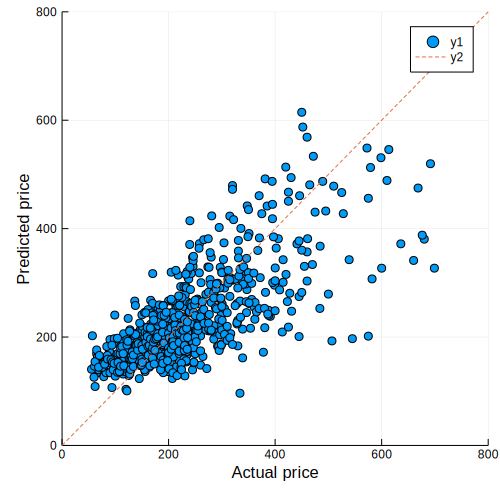

In [47]:
v = 54.4017;
beta = [ 147.7251, -18.8534 ];
predicted = v .+ beta[1] * area + beta[2] * beds;
using Plots
scatter(price, predicted, lims = (0,800));
plot!([0, 800], [0, 800], linestyle = :dash)
# make axes equal and add labels
plot!(xlims = (0,800), ylims = (0,800), size = (500,500))
plot!(xlabel = "Actual price", ylabel = "Predicted price")

# Chapter 6: Matrices

## Matrices

### Creating matrices from the entries.

Matrices are represented in Julia as 2-dimensional arrays. These are constructed by giving the elements in each row, separated by space, with the rows separated by semicolons. For example, the 3 × 4 matrix
$$
A =
\begin{bmatrix}
0 & 1 & -2.3 & 0.1 \\
1.3 & 4 & -0.1 & 0 \\
4.1 & -1 & 0 & 1.7
\end{bmatrix}
$$
is constructed in Julia as

In [48]:
A = [0.0  1.0 -2.3  0.1;
    1.3  4.0 -0.1  0.0;
    4.1 -1.0 0.0 1.7]

3×4 Array{Float64,2}:
 0.0   1.0  -2.3  0.1
 1.3   4.0  -0.1  0.0
 4.1  -1.0   0.0  1.7

(Here, `Array{Float64,2}` above the array tells us that the array is 2-dimensional, and its entries are 64-bit floating-point numbers.) In this example, we put the different rows of the matrix on different lines, which makes the code more readable, but there is no need to do this; we get the same matrix with

In [49]:
A = [0 1 -2.3 0.1; 1.3 4 -0.1 0; 4.1 -1 0 1.7]

3×4 Array{Float64,2}:
 0.0   1.0  -2.3  0.1
 1.3   4.0  -0.1  0.0
 4.1  -1.0   0.0  1.7

In VMLS we use $\| A \|$ to denote the norm of an $m \times n$ matrix,
$$
\| A \| =
\left(
\sum_{i=1}^m
\sum_{j=1}^n
A_{ij}^2
\right)^2
$$
In standard mathematical notation, this is more often written as $\|A\|_F$ , where $F$ stands for the name Frobenius. In standard mathematical notation, $\|A\|$ usually refers to another norm of a matrix, that is beyond the scope of the topics in VMLS. In Julia, `norm(A)` gives the norm used in VMLS.

In [51]:
A = [2 3 -1; 0 -1 4]
norm(A)

5.5677643628300215

In [52]:
norm(A[:])

5.5677643628300215

# Chapter 12: Least squares

## Solusion

### Least squares solution formula.

Let’s check the solution formulas (12.5) and (12.6) in VMLS,
$$
\hat{x} = (A^T A)^{-1} A^T b = A^\dagger b
$$
for the small example of Figure 12.1) (where $\hat{x} = (1/3, 1/3)$).

# Chapter 15: Multi-objective least squares

## 15.5 Complexity


The kernel trick. Let’s check the kernel trick, described in §15.5.2, to find $\hat{x}$, the
minimizer of
$$
\| A x - b \|^2 + \lambda \| x - x^\mathrm{des} \|^2,
$$
where $A$ is an $m \times n$ matrix and $\lambda > 0$. We’ll compute $\hat{x}$ two ways. First, the naïve
way, and then, using the kernel trick. We use the fact that if
$$
\begin{bmatrix}
A^T \\
\sqrt{\lambda} I
\end{bmatrix} = QR,
$$
then
$$
(A A^T + \lambda I)^{-1} = (R^T Q^T Q R)^{-1} = R^{-1} R^{-T}.
$$


# Chapter 18: 

In [62]:
import VMLS.levenberg_marquardt # just for debug

In [63]:
function levenberg_marquardt(f, Df, x1, lambda1; kmax=100, tol=1e-6)
    n = length(x1)
    x = x1
    lambda = lambda1
    objectives = zeros(0,1)
    residuals = zeros(0,1)
    for k = 1:kmax
         fk = f(x)
         Dfk = Df(x)
         objectives = [objectives; norm(fk)^2]
         residuals = [residuals; norm(2*Dfk'*fk)]
         if norm(2*Dfk'*fk) < tol
             break  
         end;
         xt = x - [ Dfk; sqrt(lambda)*eye(n) ] \ [ fk; zeros(n) ]
         if norm(f(xt)) < norm(fk)
             lambda = 0.8*lambda
             x = xt
         else
             lambda = 2.0*lambda
         end
    end
    return x, Dict([ ("objectives", objectives), ("residuals", residuals) ])
end

levenberg_marquardt (generic function with 1 method)

# Chapter 19: Constrained nonlinear least squares

## 19.1 Constrained nonlinear least squares

## 19.2 Penalty algorithm

Let’s implement the penalty algorithm (algorithm 19.1 in VMLS).


In [64]:
function penalty_method(f, Df, g, Dg, x1, lambda1; kmax = 100,
                        feas_tol = 1e-4, oc_tol = 1e-4)
x = x1
mu = 1.0
feas_res = [norm(g(x))]
oc_res = [norm(2*Df(x)'*f(x) + 2*mu*Dg(x)'*g(x))] 
lm_iters = zeros(Int64,0,1);
for k=1:kmax
  F(x) = [f(x); sqrt(mu)*g(x)]
  DF(x) = [Df(x); sqrt(mu)*Dg(x)]
  x, hist = levenberg_marquardt(F,DF,x,lambda1,tol=oc_tol)
  feas_res = [feas_res; norm(g(x))]
  oc_res = [oc_res; hist["residuals"][end]]
  lm_iters = [lm_iters; length(hist["residuals"])]
  if norm(g(x)) < feas_tol
    break
  end
  mu = 2*mu
end
return x, Dict([ ("lm_iterations", lm_iters),
                 ("feas_res", feas_res), ("oc_res", oc_res) ])
end

penalty_method (generic function with 1 method)

In [65]:
f(x) = [ x[1] + exp(-x[2]), x[1]^2 + 2*x[2] + 1 ];
Df(x) = [ 1.0 - exp(-x[2]);  2*x[1]  2 ];
g(x) = [ x[1] + x[1]^3 + x[2] + x[2]^2 ];
Dg(x) = [ 1 + 3*x[1]^2  1 + 2*x[2] ];
x, hist = penalty_method(f, Df, g, Dg, [0.5, -0.5], 1.0);
x

ArgumentError: ArgumentError: row 2 has mismatched number of columns (expected 1, got 2)